# Exploring Dandiset 001361: A Flexible Hippocampal Population Code for Experience Relative to Reward

**Important Note:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

## Overview
This notebook explores the data in Dandiset 001361, version 0.250406.0045, which contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. This Dandiset is associated with the paper "A flexible hippocampal population code for experience relative to reward" by Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025).

Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

This notebook will cover the following:

1.  Loading the Dandiset using the DANDI API.
2.  Loading and exploring an NWB file from the Dandiset.
3.  Visualizing position data.
4.  Examining the relationship between position and reward.
5.  Exploring cell segmentation data.
6.  Comparing fluorescence activity between cells and non-cells.

## Required Packages
The following packages are required to run this notebook:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   pandas
*   seaborn

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading the Dandiset
Connect to the DANDI archive and load the Dandiset.
Make sure you have the dandi library installed, as well as the other packages described above.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Loading an NWB File
Load one of the NWB files in the Dandiset and show some metadata. We will load the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.
The URL for this asset can be obtained as described above.

In [3]:
url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Session ID: {nwb.session_id}")
print(f"Subject ID: {nwb.subject.subject_id}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: processed suite2p data
Experimenter: ('Mari Sosa',)
Session ID: 03
Subject ID: m11


## Contents of the NWB File
Here is a summary of the contents of the NWB file:

### /
*   **session_description:** processed suite2p data
*   **identifier:** /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
*   **session_start_time:** 2023-02-23T00:00:00-08:00
*   **experimenter:** Mari Sosa

### /acquisition
*   **TwoPhotonSeries:**
    *   **data:**  shape (19818, 512, 796)
    *   **rate:** 15.5078125 Hz
    *   **imaging_plane:**
        *   **description:** standard
        *   **indicator:** GCaMP7f
        *   **location:** hippocampus, CA1

### /processing
*   **behavior:**
    *   **BehavioralTimeSeries:**
        *   **Reward:**
            *   **data:** shape (69,)
        *   **position:**
            *   **data:** shape (20684,)
*   **ophys:**
    *   **Fluorescence:**
        *   **roi_response_series:**
            *   **plane0:**
                *   **data:** shape (19818, 349)
    *   **ImageSegmentation:**
        *   **PlaneSegmentation:**
            *   **iscell:** shape (349, 2)

You can explore this NWB file on neurosift here:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft

## Position Data
Load and visualize the position data from the NWB file.

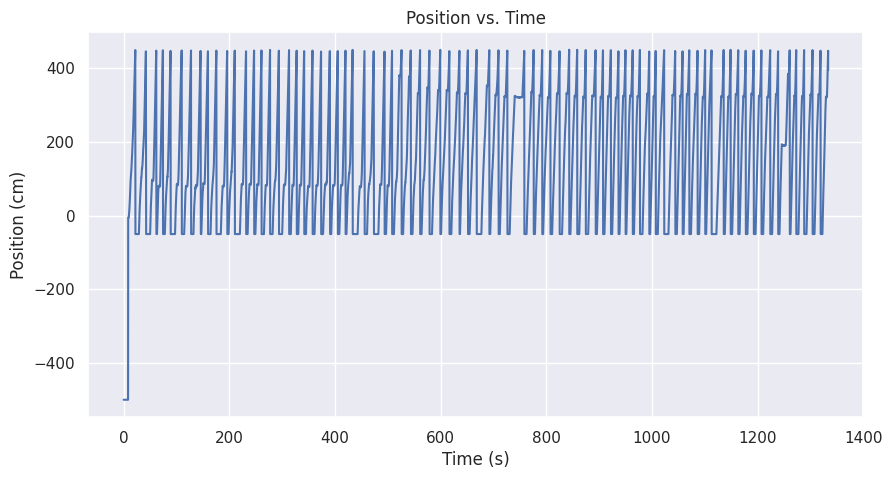

In [4]:
# Get the position data
position = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series['position']
position_data = position.data[:]
position_timestamps = position.timestamps[:]

# Plot the position data
sns.set_theme()
plt.figure(figsize=(10, 5))
plt.plot(position_timestamps, position_data)
plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')
plt.title('Position vs. Time')
plt.show()

The plot shows the position of the mouse in the virtual environment over time. The mouse appears to be running back and forth on a track.

## Reward Data
Load and visualize the reward data and relate it to the position data.

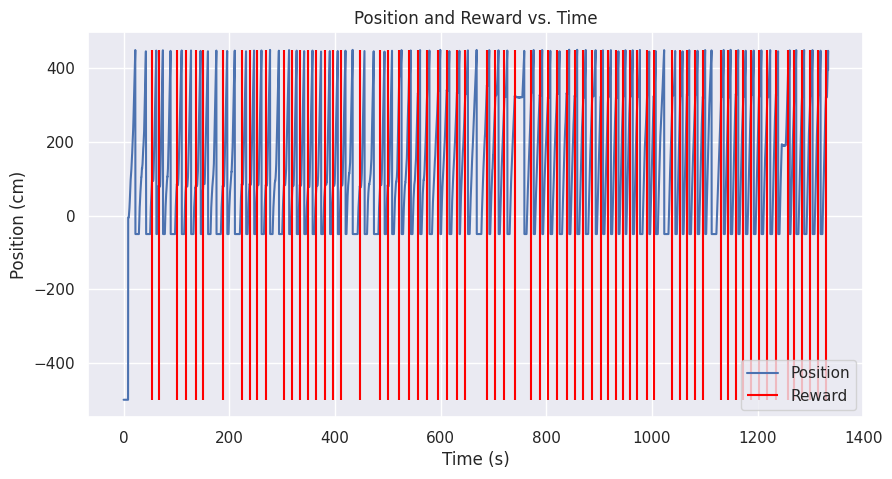

In [5]:
# Get the position and reward data
reward = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series['Reward']
reward_data = reward.data[:]
reward_timestamps = reward.timestamps[:]

# Plot the position and reward data
plt.figure(figsize=(10, 5))
plt.plot(position_timestamps, position_data, label='Position')
plt.vlines(reward_timestamps, ymin=min(position_data), ymax=max(position_data), color='red', label='Reward')
plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')
plt.title('Position and Reward vs. Time')
plt.legend()
plt.show()

The plot shows the position of the mouse along with the times when rewards were delivered. The rewards appear to be delivered at specific locations on the track, but there is some variability.

## Cell Segmentation Data
Load and visualize the cell segmentation data.  This uses the `iscell` field in the `PlaneSegmentation` to distinguish cells from non-cells.

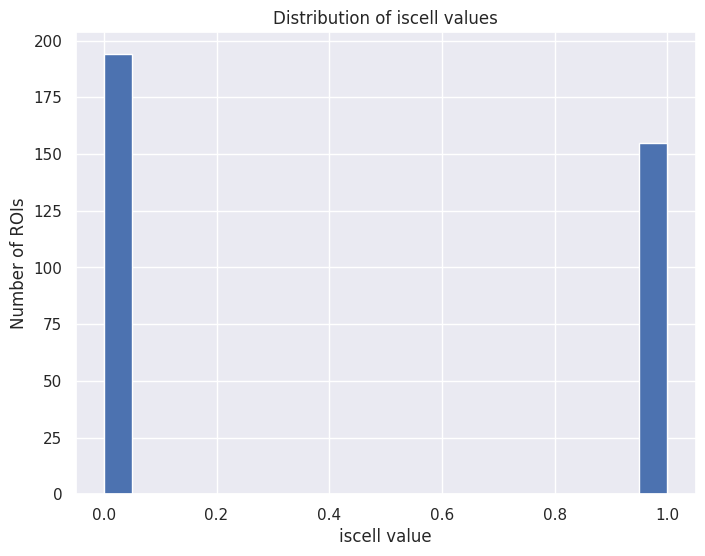

In [6]:
# Get the iscell data
plane_segmentation = nwb.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
iscell_data = plane_segmentation.iscell[:]
iscell_df = pd.DataFrame(iscell_data, columns=['iscell', 'probcell'])

# Plot the distribution of iscell values
plt.figure(figsize=(8, 6))
plt.hist(iscell_df['iscell'], bins=20)
plt.xlabel('iscell value')
plt.ylabel('Number of ROIs')
plt.title('Distribution of iscell values')
plt.show()

The histogram shows the distribution of the `iscell` values.  The bimodal distribution suggests a clear separation between cells and non-cells, as determined by the cell segmentation algorithm.

## Fluorescence Data for Cells vs. Non-cells
Load the fluorescence data and compare the activity of cells and non-cells.

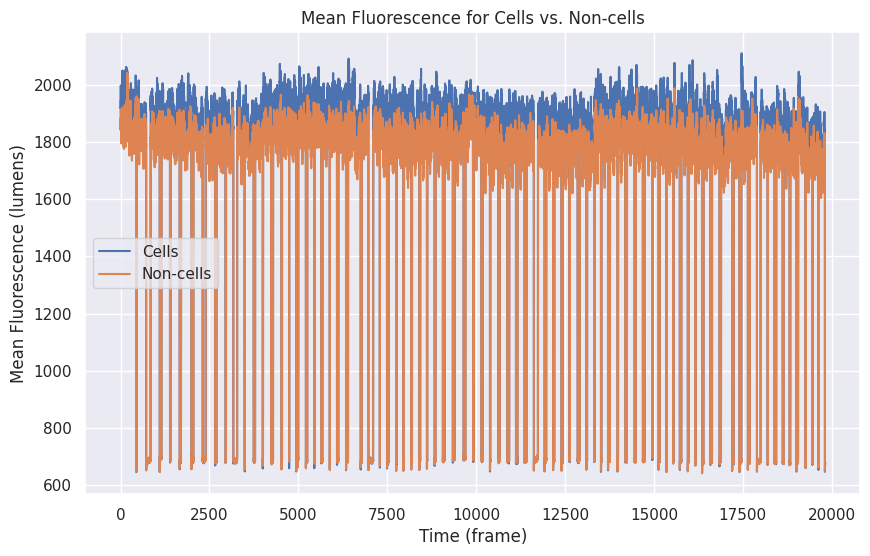

In [7]:
# Get the fluorescence data
fluorescence = nwb.processing['ophys'].data_interfaces['Fluorescence']
roi_response_series = fluorescence.roi_response_series['plane0']
fluorescence_data = roi_response_series.data[:]

# Separate fluorescence data for cells and non-cells
cell_indices = iscell_df[iscell_df['iscell'] > 0.5].index
noncell_indices = iscell_df[iscell_df['iscell'] <= 0.5].index

cell_fluorescence = fluorescence_data[:, cell_indices]
noncell_fluorescence = fluorescence_data[:, noncell_indices]

# Calculate mean fluorescence for cells and non-cells
mean_cell_fluorescence = np.mean(cell_fluorescence, axis=1)
mean_noncell_fluorescence = np.mean(noncell_fluorescence, axis=1)

# Plot the mean fluorescence for cells and non-cells
plt.figure(figsize=(10, 6))
plt.plot(mean_cell_fluorescence, label='Cells')
plt.plot(mean_noncell_fluorescence, label='Non-cells')
plt.xlabel('Time (frame)')
plt.ylabel('Mean Fluorescence (lumens)')
plt.title('Mean Fluorescence for Cells vs. Non-cells')
plt.legend()
plt.show()

This plot shows the mean fluorescence activity for cells and non-cells.  The cells generally have higher mean fluorescence than the non-cells.

## Findings and Future Directions
This notebook has demonstrated how to load and explore data from Dandiset 001361. We have shown how to:

*   Load the Dandiset using the DANDI API.
*   Load and explore an NWB file.
*   Visualize position data.
*   Examine the relationship between position and reward.
*   Explore cell segmentation data.
*   Compare fluorescence activity between cells and non-cells.

Possible future directions for analysis include:

*   Investigating the relationship between reward and neural activity.
*   Performing more detailed analysis of the cell segmentation data.
*   Exploring other data modalities in the NWB file, such as electrophysiology data.